hospital data analysis

المهمة: تحليل بيانات المستشفى وإيجاد حلول

البيانات المتاحة (مثال افتراضي)

بيانات المرضى1:
العمر، الجنس
التشخيص
مدة الإقامة
الأدوية الموصوفة
النتائج الطبية (مثل ضغط الدم، السكر، الكوليسترول)
2بيانات الطاقم الطبي:
عدد الأطباء والممرضين لكل قسم
أوقات الدوام
نسب الأداء (عدد المرضى لكل طبيب)
3بيانات العمليات:
عدد العمليات الشهرية
نوع العمليات (جراحية، بسيطة، طارئة)
معدلات النجاح أو المضاعفات
4المالية:
تكلفة كل خدمة
الإيرادات لكل قسم
المصاريف الشهرية

أهداف التحليل

معرفة أكثر الأمراض شيوعًا حسب العمر والجنس.
تقييم كفاءة الطاقم الطبي: من يقوم بمعالجة عدد أكبر من المرضى بنجاح، ومن يحتاج تدريب.
تحديد الأقسام الأعلى تكلفة والأكثر ربحًا.
اكتشاف أي مشاكل في الخدمات: تأخر علاج المرضى، ارتفاع معدل المضاعفات، إلخ.
اقتراح تحسينات مستقبلية: زيادة عدد الطاقم في قسم مزدحم، أو تحسين بروتوكولات معينة.

أسئلة للتحليل

ما هي الأمراض الأكثر شيوعًا في المستشفى؟ وهل هناك فرق بين الجنسين أو الأعمار؟
هل هناك أقسام تعاني من ضغط عمل كبير؟ كيف يمكن تحسين التوزيع؟
ما هي العمليات ذات معدل المضاعفات الأعلى؟ ما السبب المحتمل؟
أي أقسام تحقق أرباح جيدة وأيها تحقق خسائر؟ هل يمكن إعادة تخصيص الموارد؟
هل هناك علاقة بين مدة الإقامة ونتائج المرضى؟ هل يمكن تحسين بروتوكولات العلاج لتقصير مدة الإقامة؟

الأدوات والتحليلات المتوقعة

Python + Pandas: لتنظيف البيانات وتجميع الإحصاءات.
Matplotlib / Seaborn: لرسم الرسوم البيانية (مثل توزيع المرضى حسب العمر والجنس، أو معدل النجاح لكل طبيب).
Power BI أو Tableau: لإنشاء لوحة تحكم تفاعلية للمديرين.
نماذج الذكاء الاصطناعي:
تنبؤ الطلب على الأقسام الطبية
اكتشاف أنماط المشاكل الطبية أو المالية

In [2]:
# استيراد المكتبات
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ------------------------------
# 1. قراءة البيانات مع دعم الفاصل المنقوطة
# ------------------------------
patients = pd.read_csv(r"C:\Users\DELL\Desktop\hospital_data_analysis\patients.csv", sep=';')
staff = pd.read_csv(r"C:\Users\DELL\Desktop\hospital_data_analysis\staff.csv", sep=';')
operations = pd.read_csv(r"C:\Users\DELL\Desktop\hospital_data_analysis\operations.csv", sep=';')
finance = pd.read_csv(r"C:\Users\DELL\Desktop\hospital_data_analysis\finance.csv", sep=';')


In [3]:
# ------------------------------
# 2. تنظيف أسماء الأعمدة
# ------------------------------
for df in [patients, staff, operations, finance]:
    df.columns = df.columns.str.strip()           # حذف المسافات الزائدة
    df.columns = df.columns.str.replace(' ', '_') # استبدال الفراغات بـ _
    df.columns = df.columns.str.replace('\n','') # إزالة أي أسطر جديدة
    df.columns = df.columns.str.lower()           # تحويل كل شيء لأحرف صغيرة


In [4]:
# ------------------------------
# 3. تنظيف البيانات
# ------------------------------
patients.drop_duplicates(inplace=True)
patients.ffill(inplace=True)

staff.drop_duplicates(inplace=True)
operations.drop_duplicates(inplace=True)
finance.drop_duplicates(inplace=True)


In [5]:
# ------------------------------
# 4. تحويل الأعمدة الرقمية
# ------------------------------
numeric_cols_patients = ['age','length_of_stay','blood_pressure','blood_sugar','cholesterol']
for col in numeric_cols_patients:
    if col in patients.columns:
        patients[col] = pd.to_numeric(patients[col], errors='coerce')

numeric_cols_staff = ['patients_attended','avg_treatment_success']
for col in numeric_cols_staff:
    if col in staff.columns:
        staff[col] = pd.to_numeric(staff[col], errors='coerce')

numeric_cols_operations = ['success_rate']
for col in numeric_cols_operations:
    if col in operations.columns:
        operations[col] = pd.to_numeric(operations[col], errors='coerce')

numeric_cols_finance = ['revenue','expenses']
for col in numeric_cols_finance:
    if col in finance.columns:
        finance[col] = pd.to_numeric(finance[col], errors='coerce')


الأمراض الأكثر شيوعًا:
 diagnosis
Diabetes         1
Hypertension     1
Heart Disease    1
Asthma           1
...              1
Name: count, dtype: int64


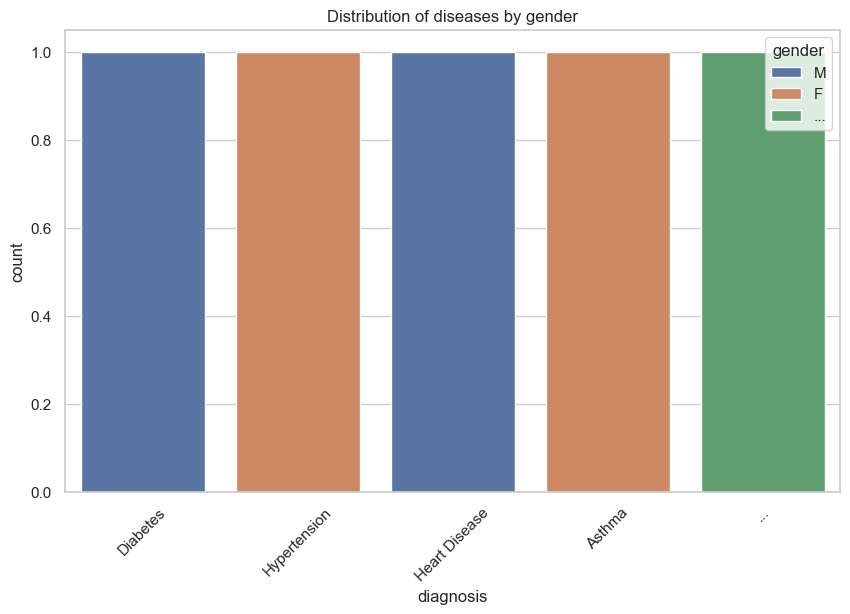


متوسط مدة الإقامة لكل مرض:
 diagnosis
...              NaN
Asthma           2.0
Diabetes         5.0
Heart Disease    7.0
Hypertension     3.0
Name: length_of_stay, dtype: float64


In [6]:
# ------------------------------
# 5. تحليل بيانات المرضى
# ------------------------------
disease_counts = patients['diagnosis'].value_counts()
print("الأمراض الأكثر شيوعًا:\n", disease_counts)

plt.figure(figsize=(10,6))
sns.countplot(data=patients, x='diagnosis', hue='gender')
plt.title("Distribution of diseases by gender")
plt.xticks(rotation=45)
plt.show()

avg_stay = patients.groupby('diagnosis')['length_of_stay'].mean()
print("\nمتوسط مدة الإقامة لكل مرض:\n", avg_stay)


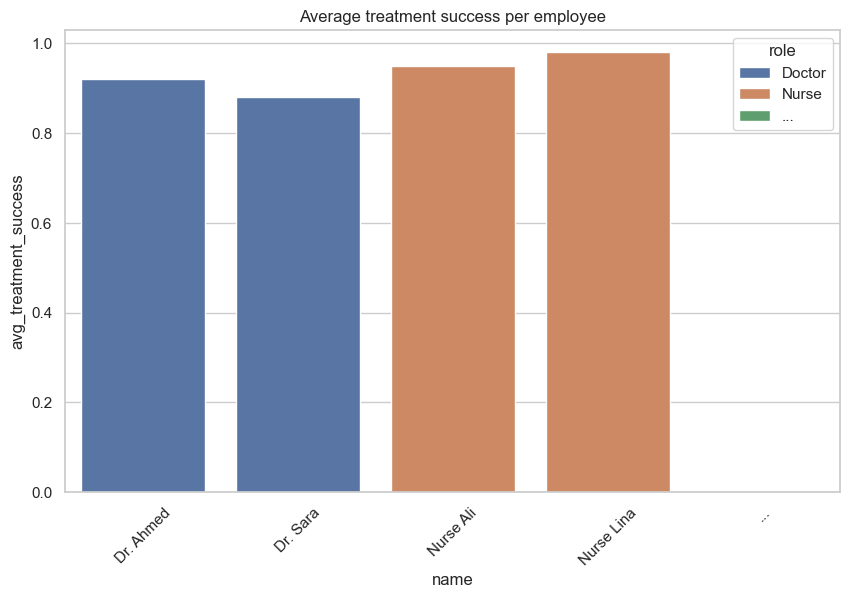


عدد المرضى لكل قسم (ضغط العمل):
 department
Cardiology       110.0
Pediatrics        45.0
Endocrinology     40.0
...                0.0
Name: patients_attended, dtype: float64


In [7]:
# ------------------------------
# 6. تحليل أداء الطاقم الطبي
# ------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=staff, x='name', y='avg_treatment_success', hue='role')
plt.title("Average treatment success per employee")
plt.xticks(rotation=45)
plt.show()

dept_workload = staff.groupby('department')['patients_attended'].sum().sort_values(ascending=False)
print("\nعدد المرضى لكل قسم (ضغط العمل):\n", dept_workload)


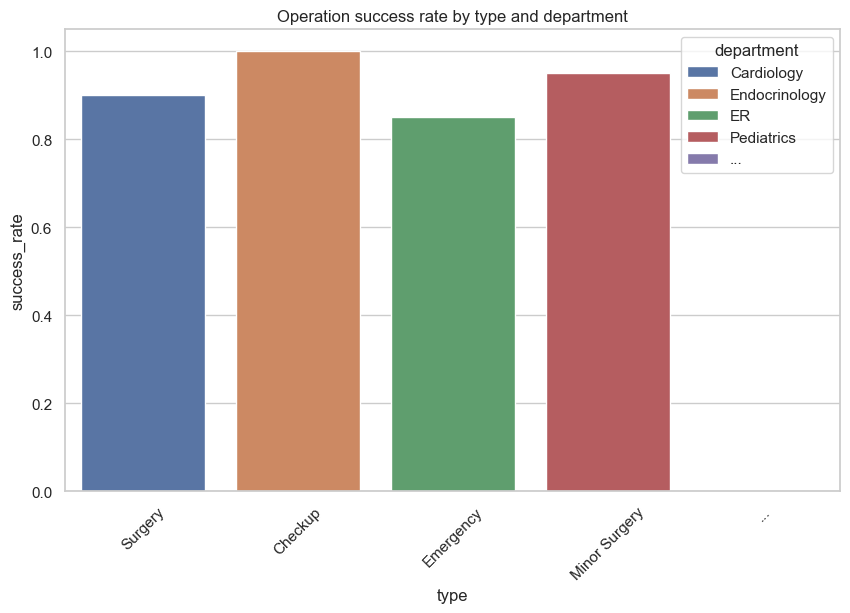


العمليات التي تحتاج تحسين:
   operation_id       type department  success_rate month  unnamed:_5  \
2            3  Emergency         ER          0.85   Jan         NaN   

   unnamed:_6  unnamed:_7  unnamed:_8  
2         NaN         NaN         NaN  


In [8]:
# ------------------------------
# 7. تحليل العمليات
# ------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=operations, x='type', y='success_rate', hue='department')
plt.title("Operation success rate by type and department")
plt.xticks(rotation=45)
plt.show()

low_success = operations[operations['success_rate'] < 0.9]
print("\nالعمليات التي تحتاج تحسين:\n", low_success)


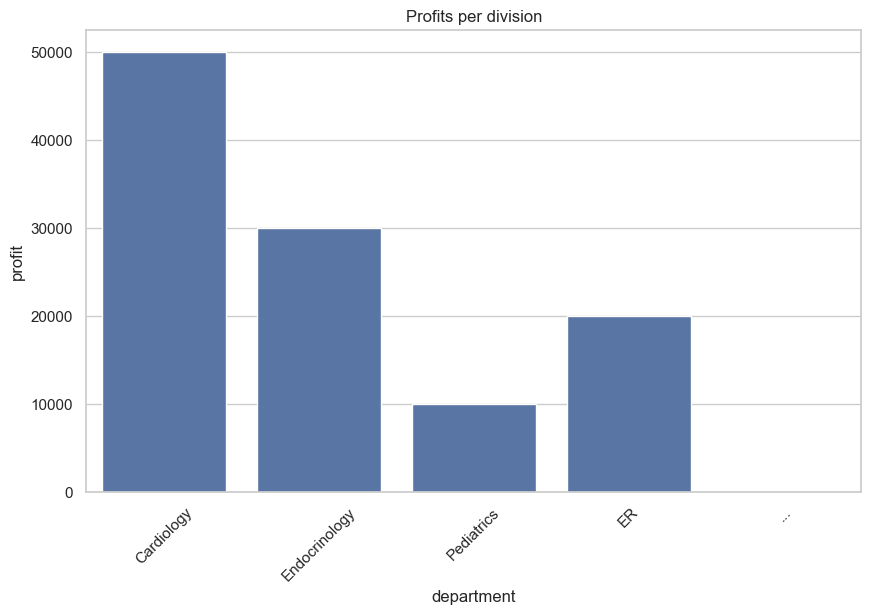


الأقسام الأقل ربحًا:
    department   revenue  expenses   profit  unnamed:_4  unnamed:_5  \
2  Pediatrics  100000.0   90000.0  10000.0         NaN         NaN   
3          ER  180000.0  160000.0  20000.0         NaN         NaN   

   unnamed:_6  unnamed:_7  unnamed:_8  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  


In [9]:
# ------------------------------
# 8. التحليل المالي
# ------------------------------
finance['profit'] = finance['revenue'] - finance['expenses']
plt.figure(figsize=(10,6))
sns.barplot(data=finance, x='department', y='profit')
plt.title("Profits per division")
plt.xticks(rotation=45)
plt.show()

low_profit = finance[finance['profit'] < finance['profit'].mean()]
print("\nالأقسام الأقل ربحًا:\n", low_profit)


In [10]:
# ------------------------------
# 9. توصيات عملية
# ------------------------------
print("\nتوصيات المستشفى:")
print("- زيادة عدد الطاقم في الأقسام ذات ضغط العمل العالي:", dept_workload.idxmax())
print("- تحسين بروتوكولات العمليات ذات معدل نجاح منخفض:", list(low_success['type']))
print("- إعادة تقييم الأقسام الأقل ربحًا لتقليل المصاريف أو زيادة الإيرادات:", list(low_profit['department']))
print("- مراقبة مدة الإقامة وتقليلها للأمراض ذات مدة إقامة طويلة لتحسين الكفاءة")



توصيات المستشفى:
- زيادة عدد الطاقم في الأقسام ذات ضغط العمل العالي: Cardiology
- تحسين بروتوكولات العمليات ذات معدل نجاح منخفض: ['Emergency']
- إعادة تقييم الأقسام الأقل ربحًا لتقليل المصاريف أو زيادة الإيرادات: ['Pediatrics', 'ER']
- مراقبة مدة الإقامة وتقليلها للأمراض ذات مدة إقامة طويلة لتحسين الكفاءة


END